In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Import Statsmodels
from statsmodels.tsa.api import VAR
from statsmodels.tsa.stattools import adfuller
from statsmodels.tools.eval_measures import rmse, aic

In [2]:
regional_df = pd.read_csv(r'data\regional_white_percentage_df.csv', parse_dates=['years'], index_col='years')
regional_df

,Region 1,Region 2,Region 3,Region 4,Region 5,Region 6,Region 7,Region 8,Region 9,Region 10,Region 11,Region 12,Region 13,Region 14,Region 15,Region 16
years,,,,,,,,,,,,,,,,
1984-01-01,78.530466,76.907322,86.815156,49.759345,33.978495,23.320533,17.578085,28.410138,85.954941,26.052227,87.652330,93.814644,10.650282,73.379416,76.707629,36.021505
1985-01-01,67.921147,68.415259,80.977983,46.902202,76.881720,69.470046,40.995904,48.433180,51.072709,61.426011,88.422939,84.313876,8.402458,89.060420,77.552483,6.162314
1986-01-01,76.169995,87.311828,75.560676,6.484895,74.843830,77.703533,34.137225,70.133129,89.380440,65.294419,75.819252,72.496160,20.084485,88.287250,87.370712,5.591398
1987-01-01,66.756272,87.869944,83.819764,5.793651,88.133641,49.024578,6.827957,67.603687,80.686124,85.225294,87.980031,77.677931,29.649258,62.969790,43.824885,21.098310
1988-01-01,29.132104,32.877624,16.694828,21.664107,88.497184,79.086022,5.970302,81.612903,82.585765,66.715310,83.443420,65.555556,74.710701,90.064004,70.125448,35.944700
1989-01-01,26.052227,89.295955,37.549923,41.029186,29.116743,17.534562,17.519201,84.487967,90.291859,87.652330,93.274450,27.875064,78.579109,86.543779,63.225806,72.885305
1990-01-01,61.426011,81.095750,32.496160,76.482335,88.924731,40.010241,33.599590,40.911418,40.250896,88.422939,76.594982,24.877112,88.156682,87.944188,10.532514,62.596006
1991-01-01,65.294419,73.768561,4.034818,67.140297,85.791091,35.906298,64.206349,82.478239,69.687660,75.819252,67.434716,56.044547,87.757296,86.748592,10.721966,82.063492
1992-01-01,85.225294,78.210445,2.383513,86.395289,62.754736,3.323093,61.011265,79.231951,64.150026,87.980031,75.266257,62.798259,31.280082,18.507424,38.200205,82.311828


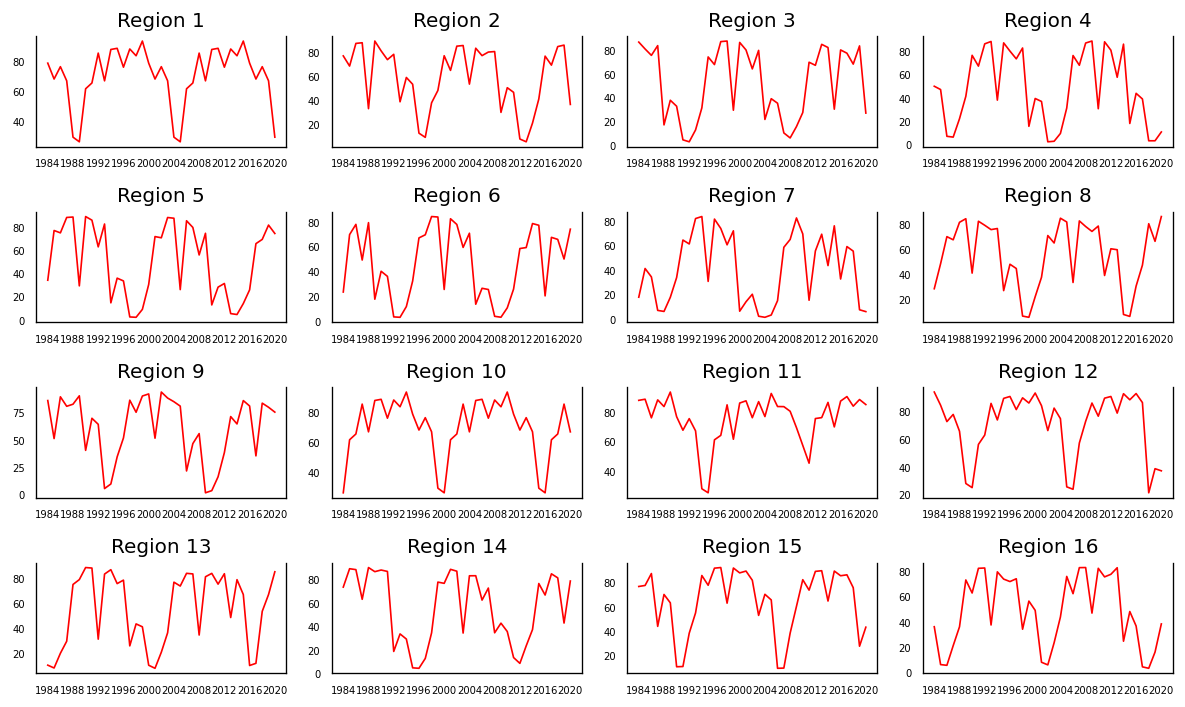

In [3]:
fig, axes = plt.subplots(nrows=4, ncols=4, dpi=120, figsize=(10,6))
for i, ax in enumerate(axes.flatten()):
    data = regional_df[regional_df.columns[i]]
    ax.plot(data, color='red', linewidth=1)
    ax.set_title(regional_df.columns[i])
    ax.xaxis.set_ticks_position('none')
    ax.yaxis.set_ticks_position('none')
    ax.spines["top"].set_alpha(0)
    ax.tick_params(labelsize=6)

plt.tight_layout();

In [4]:
correlation_matrix = regional_df.corr()
print(correlation_matrix)

           Region 1  Region 2  Region 3  Region 4  Region 5  Region 6  \
Region 1   1.000000 -0.202032  0.303011  0.299086 -0.484068 -0.012691   
Region 2  -0.202032  1.000000 -0.056018 -0.398204  0.473903 -0.287820   
Region 3   0.303011 -0.056018  1.000000 -0.152023 -0.289547  0.424682   
Region 4   0.299086 -0.398204 -0.152023  1.000000 -0.237188 -0.420400   
Region 5  -0.484068  0.473903 -0.289547 -0.237188  1.000000 -0.008403   
Region 6  -0.012691 -0.287820  0.424682 -0.420400 -0.008403  1.000000   
Region 7   0.569115 -0.461017 -0.271800  0.448478 -0.371867 -0.129315   
Region 8  -0.529307  0.231143 -0.493227 -0.223656  0.508648 -0.325026   
Region 9  -0.198184  0.242748  0.293650 -0.564166 -0.044751  0.490448   
Region 10 -0.221813  0.056092 -0.316648  0.242655  0.278356 -0.364652   
Region 11 -0.466701  0.335647  0.168824 -0.293850  0.315697  0.208269   
Region 12  0.558996 -0.454091  0.348492  0.230209 -0.385799  0.147548   
Region 13 -0.299091 -0.308791 -0.555666  0.262748  

In [5]:
from statsmodels.tsa.stattools import adfuller

def adf_test(series):
    result = adfuller(series)
    print(f'ADF Statistic: {result[0]}')
    print(f'p-value: {result[1]}')
    
# Apply to each column in your DataFrame
for column in regional_df.columns:
    print(f'{column}:')
    adf_test(regional_df[column])
    print('\n')

Region 1:
ADF Statistic: -3.7248933092581256
p-value: 0.0037763246038346058


Region 2:
ADF Statistic: -2.852205296505228
p-value: 0.05119485659354878


Region 3:
ADF Statistic: -3.7872704096625167
p-value: 0.003040273796873796


Region 4:
ADF Statistic: -3.5736472770515393
p-value: 0.006285287730537009


Region 5:
ADF Statistic: -3.935783210598068
p-value: 0.0017867284801873133


Region 6:
ADF Statistic: -2.874793045340186
p-value: 0.04835872456013278


Region 7:
ADF Statistic: -2.8565185718028347
p-value: 0.050642974958331755


Region 8:
ADF Statistic: -3.502181227172932
p-value: 0.007931251916094204


Region 9:
ADF Statistic: -3.3886366812451905
p-value: 0.011352399978407188


Region 10:
ADF Statistic: -4.086788608685338
p-value: 0.0010183872083785062


Region 11:
ADF Statistic: -1.573428904208528
p-value: 0.4969258127430376


Region 12:
ADF Statistic: -3.3382939986352094
p-value: 0.013251131489543098


Region 13:
ADF Statistic: -3.4660403429011697
p-value: 0.008903304088068617


Re

In [6]:
df_diff = regional_df.diff().dropna()

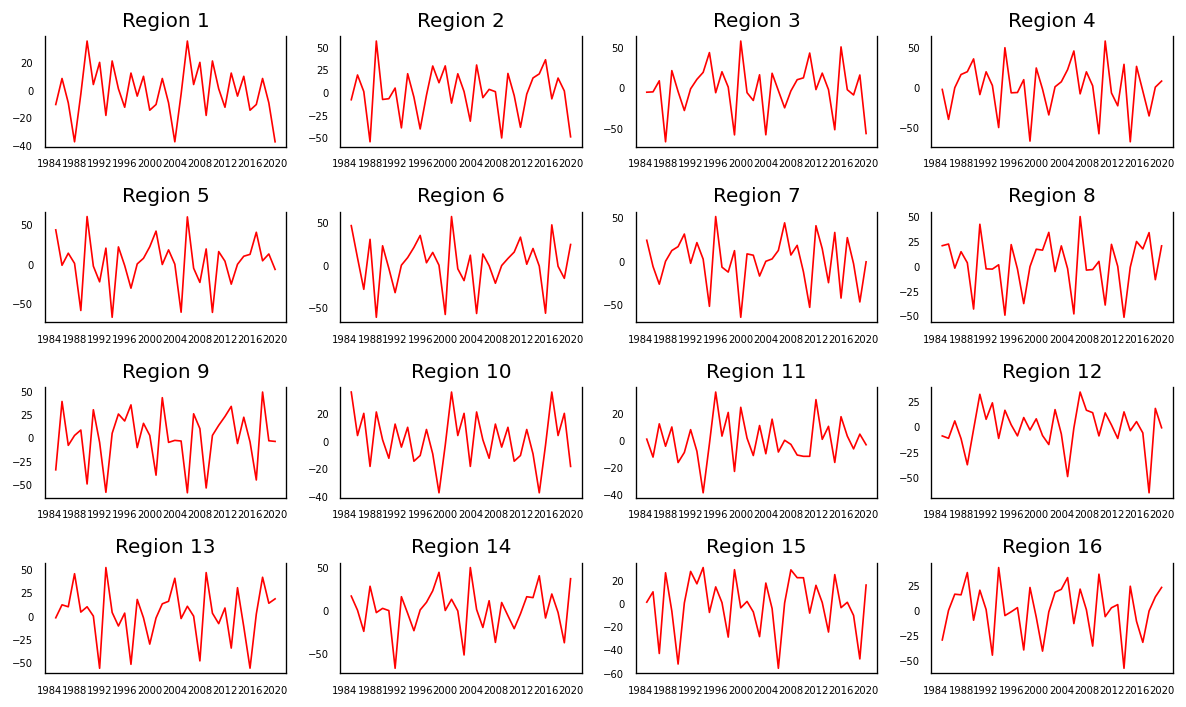

In [7]:
fig, axes = plt.subplots(nrows=4, ncols=4, dpi=120, figsize=(10,6))
for i, ax in enumerate(axes.flatten()):
    data = df_diff[df_diff.columns[i]]
    ax.plot(data, color='red', linewidth=1)
    ax.set_title(df_diff.columns[i])
    ax.xaxis.set_ticks_position('none')
    ax.yaxis.set_ticks_position('none')
    ax.spines["top"].set_alpha(0)
    ax.tick_params(labelsize=6)

plt.tight_layout();